# Performance Comparisons

python token_benchmark_ray.py --model "ospatch/QwQ-32B-INT8-W8A8" --mean-input-tokens-list 100 300 1000 3000 10000 30000 --norm-stddev-input-tokens 0.2 --mean-output-tokens 100 --stddev-output-tokens 0 --max-num-completed-requests 15 --timeout 600 --num-concurrent-requests 1 --results-dir "result_outputs" --llm-api openai --additional-sampling-params '{}'

In [1]:
import json
import pandas as pd
import seaborn as sns

In [2]:
# Measurement in Characters
#filename = "result_outputs/Llama-3-1-8B-Instruct-Q8_0_2025-03-14T13-42-01.json"
#filename = "result_outputs/QwQ-32B-IQ4_XS_2025-03-14T13-50-15.json"
#filename = "result_outputs/accounts-fireworks-models-qwq-32b_2025-03-14T14-05-39.json"
#filename = "result_outputs/gpt-4o_2025-03-14T14-22-39.json"
#filename = "result_outputs/QwQ-32B-on-4xA10G_2025-03-17T11-10-08.json"
#filename = "result_outputs/QwQ-32B-on-4xV100_2025-03-17T11-58-31.json"
#filename = "result_outputs/Qwen-QwQ-32B-AWQ_2025-03-17T14-15-45.json"
#filename = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-17T15-01-12.json"
#filename = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-17T15-13-12.json"

# Measurement in Tokens
#filename = "result_outputs/QwQ-on-Thinkstation_2025-03-19T11-17-15.json"
#filename = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-19T12-39-33.json"
filename = "result_outputs/QwQ-32B-on-4xA10G-on-llama-cpp_2025-03-19T13-30-28.json"
#filename = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T11-05-19.json"
#filename = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T11-49-37.json"

with open(filename, "rt", encoding="utf-8") as infile:
    data = json.load(infile)

In [3]:
name = data["summary"]["name"]
name

'QwQ-32B (4xA10G; EC2 g5.12xlarge; llama.cpp)'

In [4]:
df = pd.DataFrame(data["individual_responses"])
df

,error_code,error_msg,number_input_chars,number_output_chars,number_total_chars,number_input_tokens,number_output_tokens,number_total_tokens,ttft_s,total_output_time_s,end_to_end_latency_s,inter_token_latency_s,request_input_throughput_chars_per_s,request_output_throughput_chars_per_s,request_input_throughput_tokens_per_s,request_output_throughput_tokens_per_s
0,None,,335,425,760,92,100,192,0.657817,7.468132,8.125948,0.074681,509.260530,56.908475,139.856623,13.390230
1,None,,1052,440,1492,272,100,372,0.815392,7.519664,8.335056,0.075197,1290.176667,58.513253,333.581800,13.298467
2,None,,3274,437,3711,817,100,917,1.202635,7.571239,8.773873,0.075712,2722.356515,57.718428,679.341867,13.207878
3,None,,12155,452,12607,3003,100,3103,2.629229,7.763079,10.392308,0.077631,4623.028342,58.224323,1142.159943,12.881487
4,None,,36423,464,36887,8974,100,9074,8.414400,8.425904,16.840304,0.084259,4328.651007,55.068277,1066.505069,11.868163
5,None,,79388,447,79835,19545,100,19645,25.143308,9.976303,35.119611,0.099763,3157.420683,44.806178,777.344022,10.023753
6,None,,441,447,888,118,100,218,0.561305,7.478047,8.039352,0.074780,785.668942,59.774966,210.224343,13.372476
7,None,,539,464,1003,143,100,243,0.588686,7.455437,8.044123,0.074554,915.599156,62.236457,242.914062,13.413029
8,None,,3180,466,3646,794,100,894,1.292899,7.474290,8.767189,0.074743,2459.589423,62.347059,614.123900,13.379197
9,None,,8260,474,8734,2054,100,2154,1.911560,7.671793,9.583352,0.076718,4321.079135,61.784777,1074.515320,13.034763


In [5]:
measure_in_tokens = True
if measure_in_tokens:
    measure_unit = "tokens"
    measure_text = "tokens"
else:
    measure_unit = "chars"
    measure_text = "characters"

## Plot One

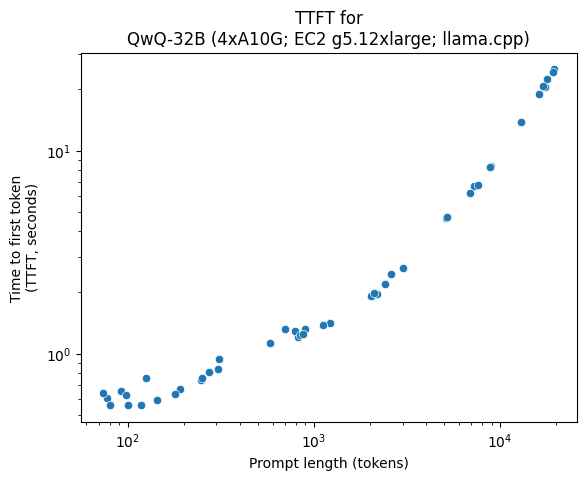

In [6]:
ax = sns.scatterplot(x=f"number_input_{measure_unit}", y="ttft_s", data=df)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title(f"TTFT for\n{name}")
ax.set_xlabel(f"Prompt length ({measure_text})")
ax.set_ylabel("Time to first token\n(TTFT, seconds)")

None  # don't return a value

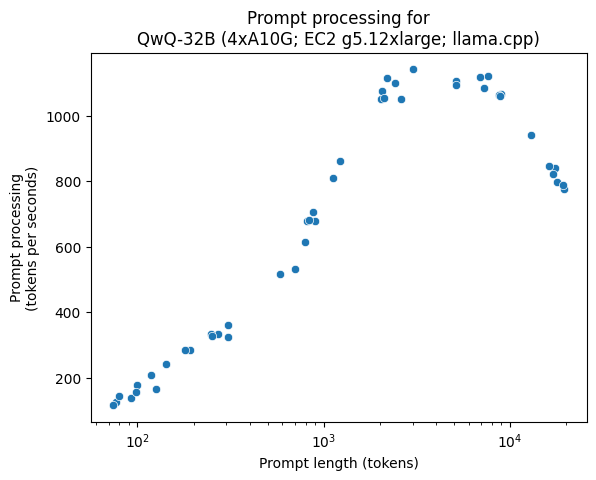

In [7]:
ax = sns.scatterplot(x=f"number_input_{measure_unit}", y=f"request_input_throughput_{measure_unit}_per_s", data=df)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_title(f"Prompt processing for\n{name}")
ax.set_xlabel(f"Prompt length ({measure_text})")
ax.set_ylabel(f"Prompt processing\n({measure_unit} per seconds)")

None  # don't return a value

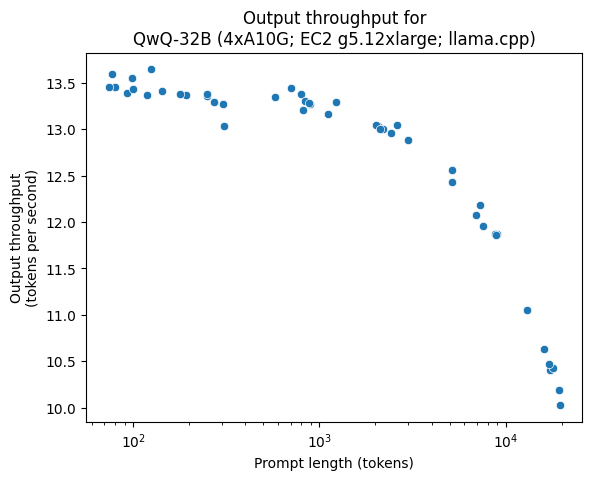

In [8]:
ax = sns.scatterplot(x=f"number_input_{measure_unit}", y=f"request_output_throughput_{measure_unit}_per_s", data=df)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_title(f"Output throughput for\n{name}")
ax.set_xlabel(f"Prompt length ({measure_text})")
ax.set_ylabel(f"Output throughput\n({measure_text} per second)")

None  # don't return a value

## Plot Two

In [9]:
# Characters
#filename2 = "result_outputs/Llama-3-1-8B-Instruct-Q8_0_2025-03-14T13-42-01.json"
#filename2 = "result_outputs/QwQ-32B-IQ4_XS_2025-03-14T13-50-15.json"
#filename2 = "result_outputs/accounts-fireworks-models-qwq-32b_2025-03-14T14-05-39.json"
#filename2 = "result_outputs/gpt-4o_2025-03-14T14-22-39.json"
#filename2 = "result_outputs/QwQ-32B-on-4xA10G_2025-03-17T11-10-08.json"

# Tokens
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-19T12-39-33.json"
#filename2 = "result_outputs/QwQ-on-Thinkstation_2025-03-19T11-17-15.json"
#filename2 = "result_outputs/accounts-fireworks-models-qwq-32b_2025-03-19T13-13-00.json"
#filename2 = "result_outputs/QwQ-32B-on-4xA10G-on-llama-cpp_2025-03-19T13-30-28.json"
#filename2 = "result_outputs/QwQ-32B-on-4xA10G-on-llama-cpp-with-flash-attn_2025-03-19T14-13-00.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-19T14-59-08.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-19T15-56-41.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-19T16-25-27.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T09-19-27.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T09-34-56.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T11-05-19.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T11-30-48.json"
#filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T11-49-37.json"
filename2 = "result_outputs/ospatch-QwQ-32B-INT8-W8A8_2025-03-20T12-17-53.json"

with open(filename2, "rt", encoding="utf-8") as infile:
    data2 = json.load(infile)

In [10]:
name2 = data2["summary"]["name"]
name2

'QwQ-32B-INT8-W8A8 (4xA10G; EC2 g5.12xlarge; vLLM with --max_num_batched_tokens 32768 --max_num_seqs 1024)'

In [16]:
name = "llama.cpp"
name2 = "vLLM with --max_num_batched_tokens 32768 --max_num_seqs 1"

In [17]:
df2 = pd.DataFrame(data2["individual_responses"])
df2

,error_code,error_msg,number_input_chars,number_output_chars,number_total_chars,number_input_tokens,number_output_tokens,number_total_tokens,ttft_s,total_output_time_s,end_to_end_latency_s,inter_token_latency_s,request_input_throughput_chars_per_s,request_output_throughput_chars_per_s,request_input_throughput_tokens_per_s,request_output_throughput_tokens_per_s
0,None,,277,409,686,83,100,183,0.874647,2.734258,3.608905,0.027343,316.699147,149.583561,94.895412,36.572998
1,None,,902,441,1343,226,100,326,0.615212,2.770375,3.385587,0.027704,1466.160505,159.184249,367.352854,36.096202
2,None,,2586,453,3039,651,100,751,0.982054,2.756936,3.738990,0.027569,2633.255650,164.312869,662.896144,36.272156
3,None,,9932,449,10381,2451,100,2551,2.561467,2.681651,5.243118,0.026817,3877.466228,167.434148,956.873714,37.290456
4,None,,28478,435,28913,7020,100,7120,6.441099,2.851522,9.292621,0.028515,4421.295274,152.550111,1089.876144,35.068991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,None,,689,467,1156,184,100,284,0.690827,2.721414,3.412242,0.027214,997.354834,171.601946,266.347300,36.745599
68,None,,3135,473,3608,780,100,880,1.168316,2.708566,3.876883,0.027086,2683.348461,174.631138,667.627368,36.919902
69,None,,7865,469,8334,1945,100,2045,2.070586,2.763893,4.834479,0.027639,3798.440891,169.688213,939.347429,36.180856
70,None,,31495,441,31936,7780,100,7880,7.198559,2.843279,10.041838,0.028433,4375.181178,155.102604,1080.771855,35.170658


### TTFT

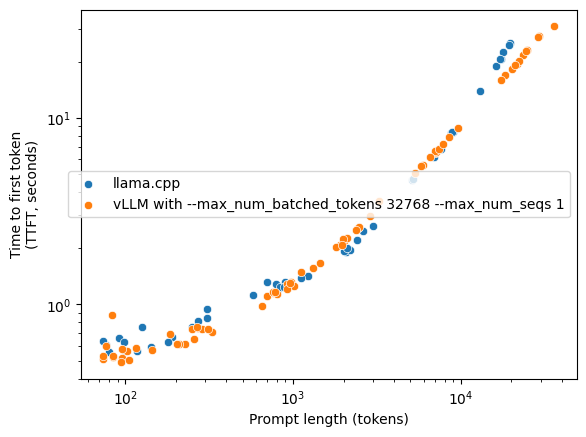

In [18]:
ax = sns.scatterplot(x=f"number_input_{measure_unit}", y="ttft_s", data=df, label=name)
sns.scatterplot(x=f"number_input_{measure_unit}", y="ttft_s", data=df2, label=name2)
ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_title(name)
#ax.set_title("QwQ-32B")
ax.set_xlabel(f"Prompt length ({measure_text})")
ax.set_ylabel("Time to first token\n(TTFT, seconds)")

None  # don't return a value

### Prompt Processing

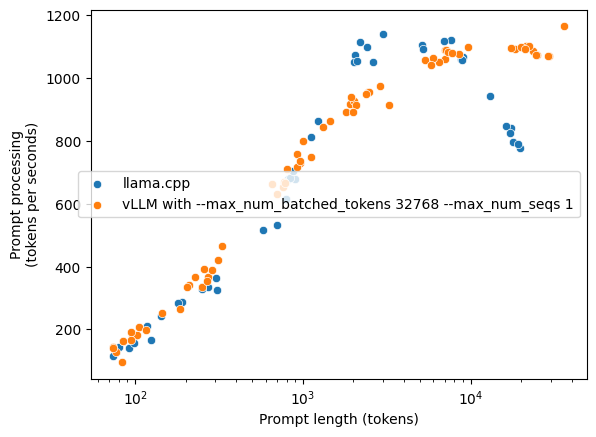

In [19]:
ax = sns.scatterplot(x=f"number_input_{measure_unit}", y=f"request_input_throughput_{measure_unit}_per_s", data=df, label=name)
sns.scatterplot(x=f"number_input_{measure_unit}", y=f"request_input_throughput_{measure_unit}_per_s", data=df2, label=name2)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel(f"Prompt length ({measure_text})")
ax.set_ylabel(f"Prompt processing\n({measure_unit} per seconds)")

None  # don't return a value

### Output throughput

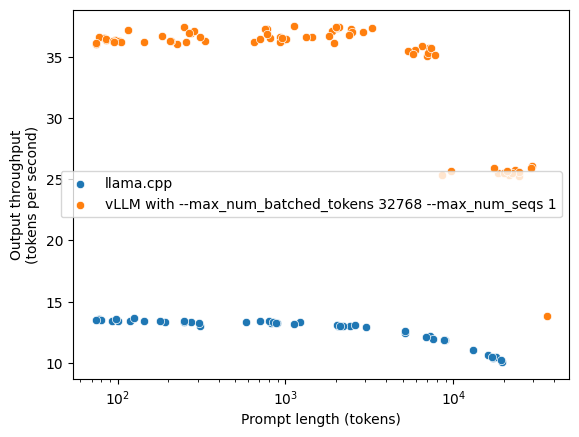

In [20]:
ax = sns.scatterplot(x=f"number_input_{measure_unit}", y=f"request_output_throughput_{measure_unit}_per_s", data=df, label=name)
ax = sns.scatterplot(x=f"number_input_{measure_unit}", y=f"request_output_throughput_{measure_unit}_per_s", data=df2, label=name2)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel(f"Prompt length ({measure_text})")
ax.set_ylabel(f"Output throughput\n({measure_text} per second)")

None  # don't return a value